In [286]:
%%html
<style>
table {float:left}
</stype>



### Source https://www.kaggle.com/c/titanic/overview

### Metadata
Field Name | Description|
 :- |:-|
survived|Survival|0 = No, 1 = Yes  
pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd  
sex|Sex  
Age|Age in years  
sibsp| number of siblings / spouses aboard the Titanic  
parch| number of parents / children aboard the Titanic  
ticket|Ticket number  
fare|Passenger fare  
cabin|Cabin number  
embarked|Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton  

In [278]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split,cross_val_predict

In [235]:
titanic_path="E:\\python_projects\\Springboard\\datasets\\titanic\\train.csv"

In [236]:
titanic_df=pd.read_csv(titanic_path,usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [237]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [238]:
titanic_df.info()
# two categorical predictors -Sex and Embarked
# all remaining predictors are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [239]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

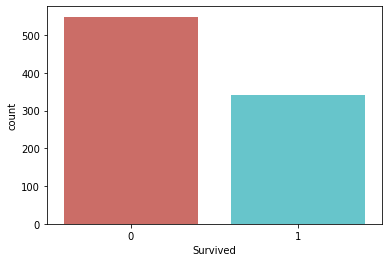

In [240]:
sns.countplot(x='Survived',data=titanic_df,palette='hls');

### Imputing records with Null Parch 

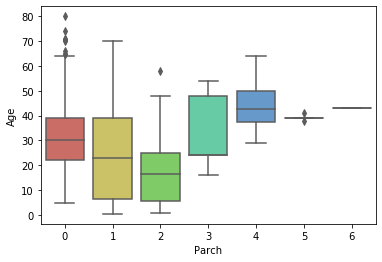

In [241]:
sns.boxplot(x='Parch',y='Age',data=titanic_df,palette='hls');

In [242]:
titanic_df.groupby(['Parch'])['Age'].agg(['mean']).reset_index()

,Parch,mean
0,0,32.178503
1,1,24.422000
2,2,17.216912
3,3,33.200000
4,4,44.500000
5,5,39.200000
6,6,43.000000


In [243]:
def fill_na_cols(cols):
    parch=cols[0]
    age=cols[1]
    if pd.isnull(age):
        if parch==0:
            return 32
        elif parch==1:
            return 24
        elif parch==2:
            return 17
        elif parch==3:
            return 33
        else :
            return 30
    else:
        return age

        

In [244]:
titanic_df['Age']=titanic_df[['Parch','Age']].apply(lambda x: fill_na_cols(x),axis=1 )

In [245]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [246]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### Deleting records with Null Embarked 

In [247]:
titanic_df.dropna(axis=0,inplace=True)

In [248]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,17.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [249]:
titanic_df.reset_index(inplace=True,drop=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S
885,1,1,female,19.0,0,0,30.0000,S
886,0,3,female,17.0,1,2,23.4500,S
887,1,1,male,26.0,0,0,30.0000,C


### Converting categorical variables to dummy indicators

In [250]:
label_binarizer=LabelBinarizer()
gender_dummy=label_binarizer.fit_transform(titanic_df['Sex'])
gender_dummy_df=pd.DataFrame(gender_dummy,columns=['male_flag'])
gender_dummy_df

,male_flag
0,1
1,0
2,0
3,0
4,1
...,...
884,1
885,0
886,0
887,1


In [251]:
embarked_dummy=label_binarizer.fit_transform(titanic_df['Embarked'])
embarked_dummy_df=pd.DataFrame(embarked_dummy,columns=label_binarizer.classes_)
embarked_dummy_df

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [252]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S
885,1,1,female,19.0,0,0,30.0000,S
886,0,3,female,17.0,1,2,23.4500,S
887,1,1,male,26.0,0,0,30.0000,C


In [253]:
titanic_df.drop(['Sex','Embarked'],inplace=True,axis=1)



In [254]:
titanic_df_new=pd.concat([titanic_df,gender_dummy_df,embarked_dummy_df],axis=1,verify_integrity=True).astype(float)

In [255]:
titanic_df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,male_flag,C,Q,S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,0.0,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,0.0,1.0
885,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,0.0,1.0
886,0.0,3.0,17.0,1.0,2.0,23.4500,0.0,0.0,0.0,1.0
887,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,1.0,0.0,0.0


### Check for corelation between variables

In [256]:
titanic_df_new.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male_flag,C,Q,S
Survived,1.000000,-0.335549,-0.072126,-0.034040,0.083151,0.255290,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.328299,0.081656,0.016824,-0.548193,0.127741,-0.245733,0.220558,0.076466
Age,-0.072126,-0.328299,1.000000,-0.295432,-0.220454,0.076341,0.103011,0.034083,0.012844,-0.037949
SibSp,-0.034040,0.081656,-0.295432,1.000000,0.414542,0.160887,-0.116348,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.220454,0.414542,1.000000,0.217532,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,0.076341,0.160887,0.217532,1.000000,-0.179958,0.270731,-0.116684,-0.163758
male_flag,-0.541585,0.127741,0.103011,-0.116348,-0.247508,-0.179958,1.000000,-0.084520,-0.075217,0.121405
C,0.169966,-0.245733,0.034083,-0.060074,-0.011588,0.270731,-0.084520,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,0.012844,-0.026692,-0.081585,-0.116684,-0.075217,-0.148646,1.000000,-0.499261
S,-0.151777,0.076466,-0.037949,0.069438,0.061512,-0.163758,0.121405,-0.782613,-0.499261,1.000000


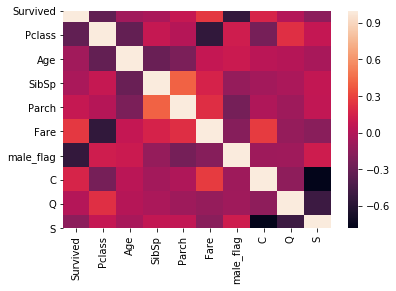

In [257]:
sns.heatmap(titanic_df_new.corr())

In [258]:
##Since the Pclass and Fare variable have a moderate negetive relationship, we can drop one of the 2- we choose to drop Fare
titanic_df_new.drop(['Fare'],inplace=True,axis=1)

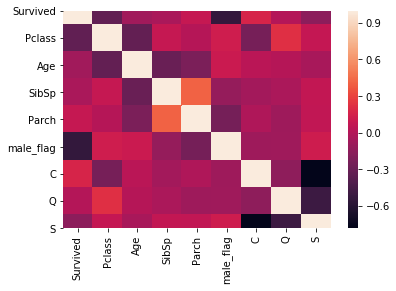

In [259]:
sns.heatmap(titanic_df_new.corr())

In [263]:
##For logistic regression, the rule of thumb is that there should be atleast 50 rows per predictor, here we have 7 predictors- hence we would need 350 rows 
titanic_df_new.info()
y=titanic_df_new['Survived']
X=X=titanic_df_new.drop(['Survived'],axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
Survived     889 non-null float64
Pclass       889 non-null float64
Age          889 non-null float64
SibSp        889 non-null float64
Parch        889 non-null float64
male_flag    889 non-null float64
C            889 non-null float64
Q            889 non-null float64
S            889 non-null float64
dtypes: float64(9)
memory usage: 62.6 KB


In [285]:
X

,Pclass,Age,SibSp,Parch,male_flag,C,Q,S
0,3.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
884,2.0,27.0,0.0,0.0,1.0,0.0,0.0,1.0
885,1.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0
886,3.0,17.0,1.0,2.0,0.0,0.0,0.0,1.0
887,1.0,26.0,0.0,0.0,1.0,1.0,0.0,0.0


In [270]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=200)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(711, 8) (178, 8)
(711,) (178,)


### Train the model

In [273]:
log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [274]:
y_pred=log_reg.predict(X_test)

### Evaluation of model

In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       109
         1.0       0.84      0.70      0.76        69

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



### K fold Cross validation and confusion matrix

In [281]:
y_train_pred=cross_val_predict(log_reg,X_train,y_train,cv=5)
confusion_matrix(y_train,y_train_pred)

array([[382,  58],
       [ 91, 180]], dtype=int64)